#### M4W Series

* [Table of Contents](M4WTOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/m4w/blob/main/Sequences.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/m4w/blob/main/Sequences.ipynb)

# Sequences of Figurate and Polyhedral Numbers

Cross references: 

* [*The Book of Numbers*](https://www.goodreads.com/book/show/682027.The_Book_of_Numbers) by Conway and Guy
* [Numeracy 101](http://4dsolutions.net/ocn/numeracy0.html) more curriculum writing
* [M4W Workshop](https://controlroom.blogspot.com/2023/08/m4w-workshop.html) blog post
* [edu-sig](https://www.python.org/community/sigs/current/edu-sig/) for archived discussions
* [math4wisdom](https://www.freelists.org/archive/math4wisdom/) for archived discussions

## Pascal's Triangle

Pascal's Triangle is a "grand central station" type topic, where many trains of thought converge. It's at the heart of the Binomial Theorem, usually celebrated as Isaac Newton's discovery. We find earlier Chinese versions. In data science, Pascal's Triangle is presented in conjunction with the Bell Curve, attributed to Gauss, with successive rows giving a discrete histogram approximation to the final curve.

The Python generator function uses the keyword `yield` in place of `return` such that the flow of execution may be surrendered but then resumed right where it left off.

In [1]:
def pascal():
    row = [1]
    while True:
        yield row
        rshift = [0] + row  # push a 0 to the front (left) [0 1 2 1]
        lshift = row + [0]  # append 0 to the end (right)  [1 2 1 0]
        row = [(a+b) for a,b in zip(rshift, lshift)]  # add the rows verically: [1 3 3 1]

In [2]:
g = pascal()
for _ in range(10):
    print(next(g))

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


## Triangular Numbers
#### (column 2)

[OEIS A000217](https://oeis.org/A000217)

The sum of two consecutive triangular numbers is a square number.  See [*Getting Serious About Series*](http://4dsolutions.net/ocn/numeracy0.html) for a visual proof.

In [3]:
g = pascal()
col = 3
for i in range(10):
    if i < col-1: 
        next(g)   # skip rows
        continue
    print(next(g)[col-1]) # column from here

1
3
6
10
15
21
28
36


## Tetrahedral Numbers
#### (column 3)

[OEIS A000292](https://oeis.org/A000292)

A tetrahedral packing of balls is likewise the cubic close packing (CCP), likewise [the face-centerd cubic](https://github.com/4dsolutions/elite_school/blob/master/Py4HS_sphere_packing_classroom.ipynb) (FCC), which, as a scaffolding of ball-center connecting edges is likewise the octet-truss used in architecture.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/5436220385/" title="Octet Truss"><img src="https://live.staticflickr.com/4101/5436220385_b1b22a89c5.jpg" width="500" height="371" alt="Octet Truss"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<br />

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/5436831548" title="Bell&#x27;s Octet Truss"><img src="https://live.staticflickr.com/4112/5436831548_feefdbb9a0.jpg" width="500" height="387" alt="Bell&#x27;s Octet Truss"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [4]:
g = pascal()
col = 4
for i in range(15):
    if i < col-1: 
        next(g)   # skip rows
        continue
    print(next(g)[col-1]) # column from here

1
4
10
20
35
56
84
120
165
220
286
364


We may look up this sequence in the Online Encyclopedia of Integer Sequences, and find it listed as [A000292](https://oeis.org/A000292). A closed form formula is provided:  n*(n+1)*(n+2)/6. Lets test it:

In [5]:
def A000292(n: int) -> int:
    return n*(n+1)*(n+2)//6

[A000292(n) for n in range(1, 12)]

[1, 4, 10, 20, 35, 56, 84, 120, 165, 220, 286]

In [6]:
A000292(22) # 22 balls along an edge

2024

A number of folks have pointed out that the year 2024 is a tetrahedral number.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/53436042585/in/datetaken/" title="Screen Shot 2024-01-01 at 8.51.15 AM"><img src="https://live.staticflickr.com/65535/53436042585_b68c5257af_z.jpg" width="543" height="640" alt="Screen Shot 2024-01-01 at 8.51.15 AM"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Deriving the Formula for Tetrahedral Numbers

How might we get the expression for tetrahedral numbers, starting from raw data, the tabulations. One way is to solve a system of 4 linear equations, starting from the hypothetical expression we seek, in the form:

$$
A n^{3} + B n^{2} + C n + D
$$

where n = 1, 2, 3, 4... and we get back 1, 4, 10, 20 etc.

Using these values for n, we get the following linear equations, with A, B, C, D still unknown to us:

$A + B + C + D = 1$

$8A + 4B + 2C + D = 4$

$27A + 9B + 3C + D = 10$

$64A + 16B + 4C + D = 20$

This is a job for linear algebra, using matrices.


In [7]:
from sympy.matrices import Matrix

$$
A^{-1} A X = A^{-1} 
\begin{bmatrix}
1 \\
4 \\
10 \\
20 \\
\end{bmatrix}
$$
which, since $A^{-1} A$ is the identity matrix, simplifies to:
$$
X = A^{-1} 
\begin{bmatrix}
1 \\
4 \\
10 \\
20 \\
\end{bmatrix}
$$
where column matrix X will contain the coefficients we seek i.e. A, B, C, D.


In [8]:
A = Matrix([[1, 1, 1, 1],[8, 4, 2, 1], [27, 9, 3, 1], [64, 16, 4, 1]])
A

Matrix([
[ 1,  1, 1, 1],
[ 8,  4, 2, 1],
[27,  9, 3, 1],
[64, 16, 4, 1]])

In [9]:
Ainv = A.inv()
Ainv

Matrix([
[ -1/6,  1/2, -1/2,  1/6],
[  3/2,   -4,  7/2,   -1],
[-13/3, 19/2,   -7, 11/6],
[    4,   -6,    4,   -1]])

In [10]:
A * Ainv

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

The coefficients we seek.

In [11]:
X = Ainv * Matrix([[1],[4], [10], [20]])
X

Matrix([
[1/6],
[1/2],
[1/3],
[  0]])

In [12]:
from sympy import Expr, Symbol, Rational, Integer

In [13]:
n = Symbol('n')
tetnumb = Rational(1,6)*n**3 + Rational(1,2)*n**2 + Rational(1,3)*n
tetnumb

n**3/6 + n**2/2 + n/3

In [14]:
tetnumb.simplify()

n*(n**2 + 3*n + 2)/6

In [15]:
tetnumb.factor()

n*(n + 1)*(n + 2)/6

In [16]:
def A000292(n: int) -> int:
    return n*(n+1)*(n+2)//6

Checking were n = 22...

In [17]:
X.T * Matrix([[22**3],[22**2], [22], [0]])  # 22nd Tetrahedral Number

Matrix([[2024]])

## Hollow Tetrahedrons

[OEIS A005893](https://oeis.org/A005893)

Lets consider only the number of balls in the most outward shell of a tetrahedron, meaning we will not count any balls not on the surface.

Multiplying successive triangular numbers by four, for each facet, is too many balls, as edge balls (excluding the tips) will be counted twice and the four tips will be counted thrice. 

So we need to subtract any edge balls once and tips twice (2 x 4 = 8). The first edge balls appear when we have 3 balls on each edge including the two tip balls. When starting out with n=1, we simply return 1.

A shorter way to get triangular numbers is using n * (n + 1) / 2 where n = 1, 2, 3...

In [18]:
def trinum(n: int):
    return n*(n+1)//2

[trinum(n) for n in range(1, 11)]

[1, 3, 6, 10, 15, 21, 28, 36, 45, 55]

In [19]:
def tetra(n: int):
    if n == 1:
        return 1
    edge_balls = 0 if (n-2)<=0 else n-2
    tip_balls  = 4
    return 4 * trinum(n) - edge_balls * 6 - tip_balls * 2

In [20]:
[tetra(n) for n in range(1, 21)]

[1,
 4,
 10,
 20,
 34,
 52,
 74,
 100,
 130,
 164,
 202,
 244,
 290,
 340,
 394,
 452,
 514,
 580,
 650,
 724]

OEIS has this sequence listed as [A005893](https://oeis.org/A005893).

## A Grand Central Station...

#### Combinatorics

In [21]:
from math import factorial

def combos(r, n):
    """
    This expression may be used to populate pascal's triangle
    r = number chosen...    (think columns)
    n = from how many total (think rows)
    """
    return factorial(n)//(factorial(r) * factorial(n-r))

In [22]:
combos(3, 9)  # how many ways might I choose 3 distinct things from a bag of 9 unique objects

84

In [23]:
[combos(i, 9) for i in range(10)]

[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]

In [24]:
[combos(i, 7) for i in range(8)]  # one way to pick 7, 7 ways to pick 1, 21 ways to pick 2...

[1, 7, 21, 35, 35, 21, 7, 1]

In [25]:
from itertools import combinations

In [26]:
? combinations

Init signature:  combinations(iterable, r)
Docstring:     
Return successive r-length combinations of elements in the iterable.

combinations(range(4), 3) --> (0,1,2), (0,1,3), (0,2,3), (1,2,3)
Type:           type
Subclasses:     

In [27]:
len(list(combinations(range(7), 3)))  # 35 ways to pick 3 from 7

35

In [28]:
len(list(combinations(range(9), 3)))  # 84 ways to pick 3 from 9

84

#### Number Theory

If and only if the number n in column 1 (e.g. the 9 in row 9) divides all the other numbers in the same row (but for the ones), without remainder, then n is prime.

See [Curated Videos](Curated_Videos.ipynb) for more information.

In [29]:
row24 = [combos(i, 23) for i in range(24)] 
row24

[1,
 23,
 253,
 1771,
 8855,
 33649,
 100947,
 245157,
 490314,
 817190,
 1144066,
 1352078,
 1352078,
 1144066,
 817190,
 490314,
 245157,
 100947,
 33649,
 8855,
 1771,
 253,
 23,
 1]

In [30]:
# showing no remainder when row elements other than 1 get divided by 23
from operator import mod

In [31]:
mod(25, 5)

0

In [32]:
mod(26, 5)

1

In [33]:
[mod(elem, 23) for elem in row24[1:-1]]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Data Science

Since we're also in the process of introducing more of the Python ecosystem, replacing the role of the graphing calculator with alternative plotting tools.

[pandas.Dataframe.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

In [34]:
import pandas as pd

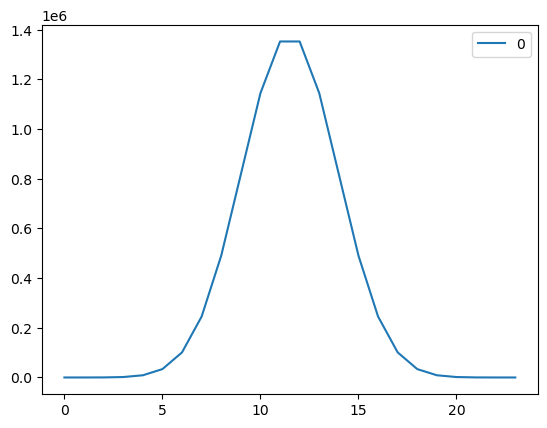

In [35]:
pd.DataFrame(row24).plot();

#### Hypertext Markup Language Protocol

Using the 3rd party requests library to query the Online Encyclopedia of Integer Sequences (OEIS)

In [36]:
import requests

In [37]:
response = requests.get("https://oeis.org/A000217")

In [38]:
response

<Response [200]>

In [39]:
print("\n".join(response.text.split("\n")[:3]))


<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>


In [40]:
response = requests.get("https://oeis.org/search?fmt=text&q=1,12,42,92,162")

In [41]:
print("\n".join(response.text.split("\n")[:10]))

# Greetings from The On-Line Encyclopedia of Integer Sequences! http://oeis.org/

Search: seq:1,12,42,92,162
Showing 1-1 of 1

%I A005901 M4834 #109 Dec 12 2023 11:11:49
%S A005901 1,12,42,92,162,252,362,492,642,812,1002,1212,1442,1692,1962,2252,
%T A005901 2562,2892,3242,3612,4002,4412,4842,5292,5762,6252,6762,7292,7842,
%U A005901 8412,9002,9612,10242,10892,11562,12252,12962,13692,14442,15212,16002
%N A005901 Number of points on surface of cuboctahedron (or icosahedron): a(0) = 1; for n > 0, a(n) = 10n^2 + 2. Also coordination sequence for f.c.c. or A_3 or D_3 lattice.


In [42]:
"Urner" in response.text # vanity search

True

## Cuboctahedral Numbers

![](http://www.4dsolutions.net/ocn/graphics/cubanim.gif)

Consider the ball packing that starts with a nuclear sphere and then acculumates successive layers of balls in the form of a growing cuboctahedron. The sequence goes:  1, 13, 55, 147... as we add 12, 42, 92... (successive layers).


$$
A n^{3} + B n^{2} + C n + D
$$

where n = 1, 2, 3, 4... and we get back 1, 13, 55, 147 etc.

Using these values for n, we get the following linear equations, with A, B, C, D still unknown to us:

$A + B + C + D = 1$

$8A + 4B + 2C + D = 13$

$27A + 9B + 3C + D = 55$

$64A + 16B + 4C + D = 147$


In [43]:
X = Ainv * Matrix([[1],[13], [55], [147]])
X

Matrix([
[10/3],
[  -5],
[11/3],
[  -1]])

Let's test it as a function:

In [44]:
def A005902(n):
    """
    https://oeis.org/A005902
    """
    return Rational(10, 3) * n**3 - 5 * n**2 + Rational(11, 3) * n - 1 

[A005902(x) for x in range(1, 12)]

[1, 13, 55, 147, 309, 561, 923, 1415, 2057, 2869, 3871]

In [45]:
icosanumb = Rational(10, 3) * n**3 - 5 * n**2 + Rational(11, 3) * n - 1 
icosanumb

10*n**3/3 - 5*n**2 + 11*n/3 - 1

In [46]:
[Integer(icosanumb.evalf(subs={'n':i})) for i in range(1, 12)]

[1, 13, 55, 147, 309, 561, 923, 1415, 2057, 2869, 3871]

In [47]:
icosanumb.factor()

(2*n - 1)*(5*n**2 - 5*n + 3)/3

OEIS gives: 

$$
a(n) = (2 n+1)(5 n^{2} + 5 n + 3)/3
$$

which assumes n = 0, 1, 2, 3... versus n = 1, 2, 3...

In [52]:
def A005902_v2(n):
    """
    https://oeis.org/A005902
    """
    return ((2*n + 1) * (5*n**2 + 5*n + 3))//3

[A005902_v2(x) for x in range(12)]  # start from i = 0

[1, 13, 55, 147, 309, 561, 923, 1415, 2057, 2869, 3871, 5083]